# Cloning the Repository

To run the code in this notebook, first clone the repository using the following command:

In [2]:
!git clone https://github.com/pachacutexx/Option-Pricing.git
%cd Option-Pricing/src/

Cloning into 'Option-Pricing'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (45/45), 13.60 KiB | 6.80 MiB/s, done.
Resolving deltas: 100% (15/15), done.


## Convergence of Tree Methods to Black-Scholes Price

The following examples illustrate how the prices of European options using binomial and trinomial tree methods converge to the Black-Scholes price as the number of steps increases. We will observe this convergence for both call and put options by plotting the prices against the number of steps.

### Convergence for Call Options

We will calculate the prices for a European call option with the following parameters: an underlying price of 100, a strike price of 100, a risk-free rate of 5%, a volatility of 20%, and a time to maturity of 1 year.

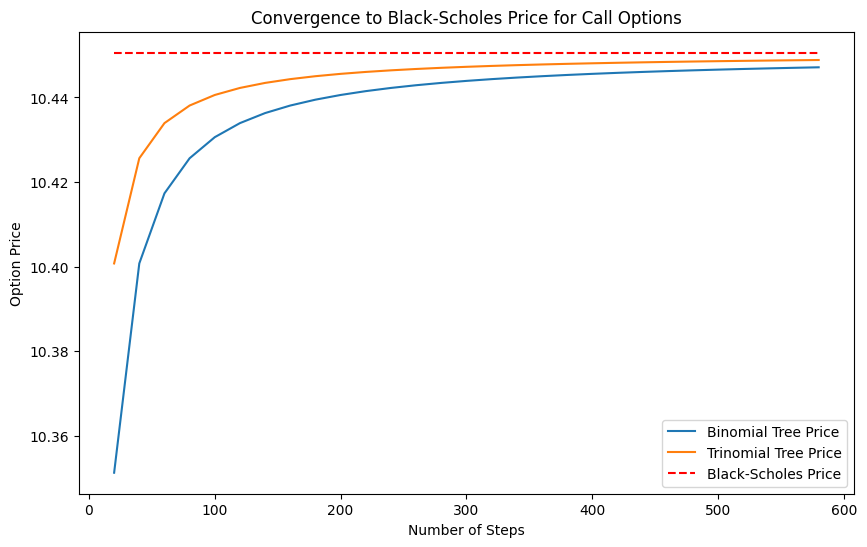

In [5]:
import matplotlib.pyplot as plt
from option_pricer import EuropeanOption
import numpy as np

# Define the parameters
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2
is_call = True

# Create an instance of the EuropeanOption class
option = EuropeanOption(S0, K, T, r, sigma, is_call)

# Initialize lists to store the prices
binomial_prices = []
trinomial_prices = []
steps_range = range(20, 600, 20)

# Calculate the option prices for varying numbers of steps
for steps in steps_range:
    option.steps = steps
    binomial_prices.append(option.price(method='binomial'))
    trinomial_prices.append(option.price(method='trinomial'))

# Calculate the Black-Scholes price
bs_price = option.price(method='black_scholes')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(steps_range, binomial_prices, label='Binomial Tree Price')
plt.plot(steps_range, trinomial_prices, label='Trinomial Tree Price')
plt.hlines(bs_price, steps_range[0], steps_range[-1], colors='r', linestyles='dashed', label='Black-Scholes Price')
plt.title('Convergence to Black-Scholes Price for Call Options')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.legend()
plt.show()

We repeat the same process for put options.

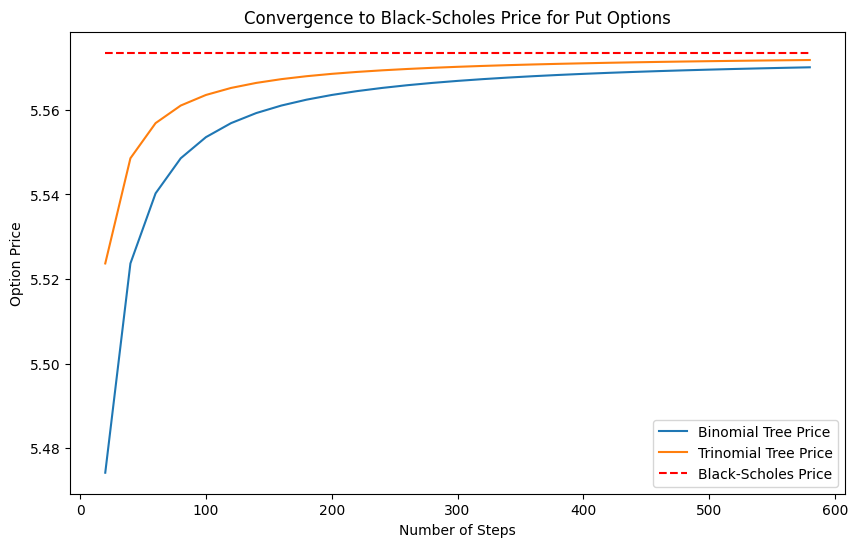

In [6]:
# Set the parameter to price puts
is_call = False

# Create an instance of the EuropeanOption class
option = EuropeanOption(S0, K, T, r, sigma, is_call)

# Initialize lists to store the prices
binomial_prices = []
trinomial_prices = []
steps_range = range(20, 600, 20)

# Calculate the option prices for varying numbers of steps
for steps in steps_range:
    option.steps = steps
    binomial_prices.append(option.price(method='binomial'))
    trinomial_prices.append(option.price(method='trinomial'))

# Calculate the Black-Scholes price
bs_price = option.price(method='black_scholes')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(steps_range, binomial_prices, label='Binomial Tree Price')
plt.plot(steps_range, trinomial_prices, label='Trinomial Tree Price')
plt.hlines(bs_price, steps_range[0], steps_range[-1], colors='r', linestyles='dashed', label='Black-Scholes Price')
plt.title('Convergence to Black-Scholes Price for Put Options')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.legend()
plt.show()

## Put-Call Parity

Put-Call Parity is a financial principle that defines a relationship between the price of a European call option and a European put option with the same strike price, underlying asset, and expiration date. The put-call parity is a key concept in options pricing and is given by the following formula:

\[ C + PV(K) = P + S \]

Where:
- \(C\) is the price of the European call option
- \(P\) is the price of the European put option
- \(PV(K)\) is the present value of the strike price \(K\), discounted at the risk-free interest rate \(r\)
- \(S\) is the current price of the underlying asset

The formula implies that buying a call and selling a put (with the same strike price and expiration) should be equivalent to holding a single forward contract on the same underlying asset with a delivery price equal to the option's strike price.

In other words, if the prices do not satisfy this relationship, there would be an arbitrage opportunity, allowing traders to make a risk-free profit. The absence of such opportunities in efficient markets is what enforces the put-call parity.

The concept can also be extended to consider dividends by adjusting the underlying asset price \(S\) for the present value of dividends expected during the life of the option.

To verify the put-call parity for our options priced using the Black-Scholes model, we can use the following Python code:

In [7]:
# Prices for call and put using Black-Scholes
call_price_bs = EuropeanOption(S0, K, T, r, sigma, is_call=True).price(method='black_scholes')
put_price_bs = EuropeanOption(S0, K, T, r, sigma, is_call=False).price(method='black_scholes')

# Verifying Put-Call Parity
put_call_parity = np.isclose(call_price_bs + K * np.exp(-r * T), put_price_bs + S0)

print(f"Put-Call Parity holds: {put_call_parity}")

Put-Call Parity holds: True
